In [66]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [67]:
df = pd.read_excel('DataBMKG2020-Apr2024.xlsx')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1554 non-null   object 
 1   Tn       1499 non-null   float64
 2   Tx       1513 non-null   float64
 3   Tavg     1521 non-null   float64
 4   RH_avg   1520 non-null   float64
 5   RR       1280 non-null   float64
 6   ss       1504 non-null   float64
 7   ff_x     1540 non-null   float64
 8   ddd_x    1540 non-null   float64
 9   ff_avg   1540 non-null   float64
 10  ddd_car  1540 non-null   object 
dtypes: float64(9), object(2)
memory usage: 133.7+ KB


In [69]:
df.head().T

,0,1,2,3,4
Date,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020
Tn,25.0,24.2,24.2,23.9,25.2
Tx,32.0,32.2,32.0,32.7,32.5
Tavg,26.5,27.8,26.6,27.8,29.2
RH_avg,89.0,84.0,87.0,83.0,73.0
RR,0.0,18.9,25.0,3.9,1.0
ss,6.9,NaN,3.1,5.2,0.7
ff_x,3.0,4.0,6.0,4.0,6.0
ddd_x,150.0,200.0,20.0,210.0,180.0
ff_avg,0.0,1.0,2.0,1.0,2.0


In [70]:
df.shape

(1554, 11)

In [71]:
df.duplicated().sum()

30

In [72]:
data = df
data = data.interpolate()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1554 non-null   object 
 1   Tn       1554 non-null   float64
 2   Tx       1554 non-null   float64
 3   Tavg     1554 non-null   float64
 4   RH_avg   1554 non-null   float64
 5   RR       1554 non-null   float64
 6   ss       1554 non-null   float64
 7   ff_x     1554 non-null   float64
 8   ddd_x    1554 non-null   float64
 9   ff_avg   1554 non-null   float64
 10  ddd_car  1540 non-null   object 
dtypes: float64(9), object(2)
memory usage: 133.7+ KB


C:\Users\Filza\AppData\Local\Temp\ipykernel_20240\2689570996.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()


In [73]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1554 non-null   object 
 1   Tn       1554 non-null   float64
 2   Tx       1554 non-null   float64
 3   Tavg     1554 non-null   float64
 4   RH_avg   1554 non-null   float64
 5   RR       1554 non-null   float64
 6   ss       1554 non-null   float64
 7   ff_x     1554 non-null   float64
 8   ddd_x    1554 non-null   float64
 9   ff_avg   1554 non-null   float64
 10  ddd_car  1540 non-null   object 
dtypes: float64(9), object(2)
memory usage: 133.7+ KB


In [74]:
input_features = ['Tn','Tx', 'Tavg','RH_avg','RR','ss','ff_x','ff_avg']
output_features = ['Tn','Tx', 'Tavg','RH_avg','RR','ss','ff_x','ff_avg']

In [75]:
X = data[input_features].values
Y = data[output_features].values

In [76]:
print(X)

[[25.  32.  26.5 ...  6.9  3.   0. ]
 [24.2 32.2 27.8 ...  5.   4.   1. ]
 [24.2 32.  26.6 ...  3.1  6.   2. ]
 ...
 [26.6 31.6 28.2 ...  9.   5.   2. ]
 [25.4 31.3 27.9 ...  9.5  5.   2. ]
 [25.4 31.3 29.7 ...  3.2  4.   3. ]]


In [77]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(Y)

In [80]:
print(y_scaled)

[[0.69444444 0.02298074 0.39726027 ... 0.59482759 0.07692308 0.        ]
 [0.58333333 0.02365664 0.57534247 ... 0.43103448 0.15384615 0.25      ]
 [0.58333333 0.02298074 0.4109589  ... 0.26724138 0.30769231 0.5       ]
 ...
 [0.91666667 0.02162893 0.63013699 ... 0.77586207 0.23076923 0.5       ]
 [0.75       0.02061507 0.5890411  ... 0.81896552 0.23076923 0.5       ]
 [0.75       0.02061507 0.83561644 ... 0.27586207 0.15384615 0.75      ]]


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled, test_size=0.2, shuffle = False,)

In [83]:
timesteps = 30
n_features_input = len(input_features)
n_features_output = len(output_features)

In [84]:
def create_sequence(x,y,time_steps) :
  x_seq = []
  y_seq = []
  for i in range(len(x)- time_steps):
    x_seq.append(x[i : i + time_steps])
    y_seq.append(y[i + time_steps])

  return np.array(x_seq), np.array(y_seq)


In [85]:
x_train_seq,y_train_seq = create_sequence(x_train,y_train,timesteps)
x_test_seq,y_test_seq = create_sequence(x_test,y_test,timesteps)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [87]:
model = Sequential()
model.add(LSTM(60, input_shape=(timesteps,n_features_input), return_sequences = True))
model.add(LSTM(60))
model.add(Dense(n_features_output))

e:\Project\chatbot-and-weather-forecast-for-farmer-in-banyuwangi\appenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
model.compile(optimizer='adam', loss='mae' )

In [89]:
print(n_features_output)

8


In [90]:
hist = model.fit(x_train_seq,y_train_seq,epochs=50, batch_size=32)

Epoch 1/50


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2047
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1033
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1005
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1026
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0981
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0979
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0970
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0966
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0970
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0934
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0954
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0943
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0934
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0928
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0941
Epoch 16/50
38/

In [91]:
import matplotlib.pyplot as plt

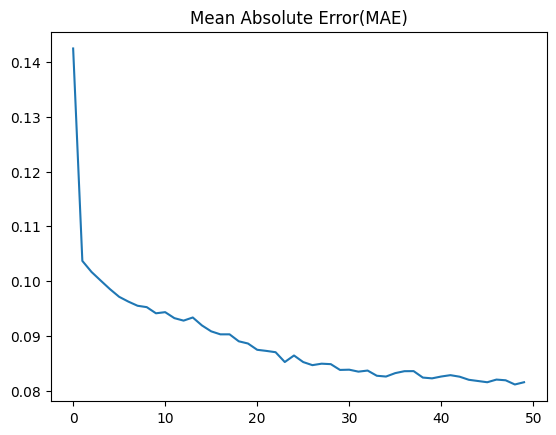

In [92]:
model_history = hist.history
loss = model_history['loss']

plt.figure()
plt.plot(loss, label='MAE')
plt.title('Mean Absolute Error(MAE)')
plt.show()

In [93]:
predictions = model.predict(x_test_seq)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [94]:
predictions = scaler.inverse_transform(predictions)

In [95]:
y_test_origin = scaler.inverse_transform(y_test_seq)

In [96]:
mae = np.mean(np.abs(predictions-y_test_origin), axis=0)

In [97]:
for i,feature in enumerate(output_features):
  print("MAE untuk fitur ", feature, " : ", mae[i])

MAE untuk fitur  Tn  :  0.5767703955708027
MAE untuk fitur  Tx  :  2.239219694035758
MAE untuk fitur  Tavg  :  0.509063265926049
MAE untuk fitur  RH_avg  :  3.1949895403987574
MAE untuk fitur  RR  :  889.9759154809485
MAE untuk fitur  ss  :  1.4532450261489362
MAE untuk fitur  ff_x  :  1.0175363364168757
MAE untuk fitur  ff_avg  :  0.4758293017798047


In [98]:
threeshold_mae_tx = (data['Tn'].max() - data['Tn'].min()) * 0.1
threeshold_mae_tn = (data['Tx'].max() - data['Tx'].min()) * 0.1
threeshold_mae_tavg = (data['Tavg'].max() - data['Tavg'].min()) * 0.1
threeshold_mae_rhavg = (data['RH_avg'].max() - data['RH_avg'].min()) * 0.1
threeshold_mae_rr = (data['RR'].max() - data['RR'].min()) * 0.1
threeshold_mae_ss = (data['ss'].max() - data['ss'].min()) * 0.1
threeshold_mae_ffx = (data['ff_x'].max() - data['ff_x'].min()) * 0.1
threeshold_mae_ffavg = (data['ff_avg'].max() - data['ff_avg'].min()) * 0.1
print(threeshold_mae_tx)
print(threeshold_mae_tn)
print(threeshold_mae_tavg)
print(threeshold_mae_rhavg)
print(threeshold_mae_rr)
print(threeshold_mae_ss)
print(threeshold_mae_ffx)
print(threeshold_mae_ffavg)


0.72
29.590000000000003
0.7299999999999998
3.8000000000000003
888.8000000000001
1.16
1.3
0.4


In [99]:
data

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2020,25.0,32.0,26.5,89.0,0.0,6.9,3.0,150.0,0.0,C
1,02-01-2020,24.2,32.2,27.8,84.0,18.9,5.0,4.0,200.0,1.0,C
2,03-01-2020,24.2,32.0,26.6,87.0,25.0,3.1,6.0,20.0,2.0,C
3,04-01-2020,23.9,32.7,27.8,83.0,3.9,5.2,4.0,210.0,1.0,C
4,05-01-2020,25.2,32.5,29.2,73.0,1.0,0.7,6.0,180.0,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...
1549,29-03-2024,25.3,31.8,28.9,76.0,7.6,6.5,4.0,150.0,2.0,SE
1550,30-03-2024,26.8,31.4,29.0,76.0,4447.8,6.8,6.0,110.0,2.0,C
1551,31-03-2024,26.6,31.6,28.2,82.0,8888.0,9.0,5.0,150.0,2.0,SW
1552,01-04-2024,25.4,31.3,27.9,85.0,24.8,9.5,5.0,150.0,2.0,W


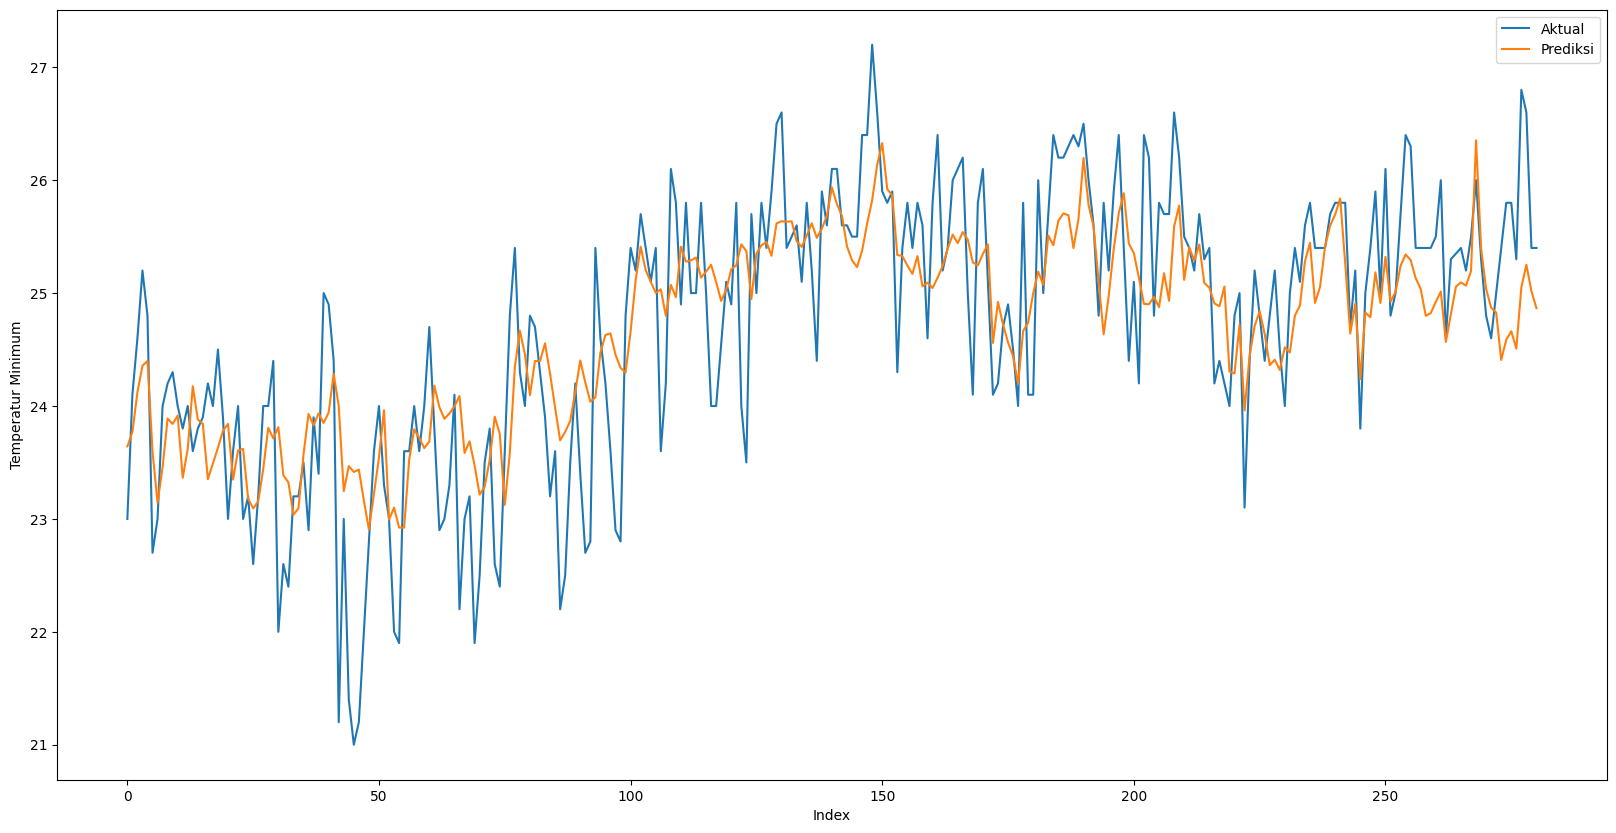

In [100]:
target_index = 0
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Temperatur Minimum')
plt.legend()
plt.show()


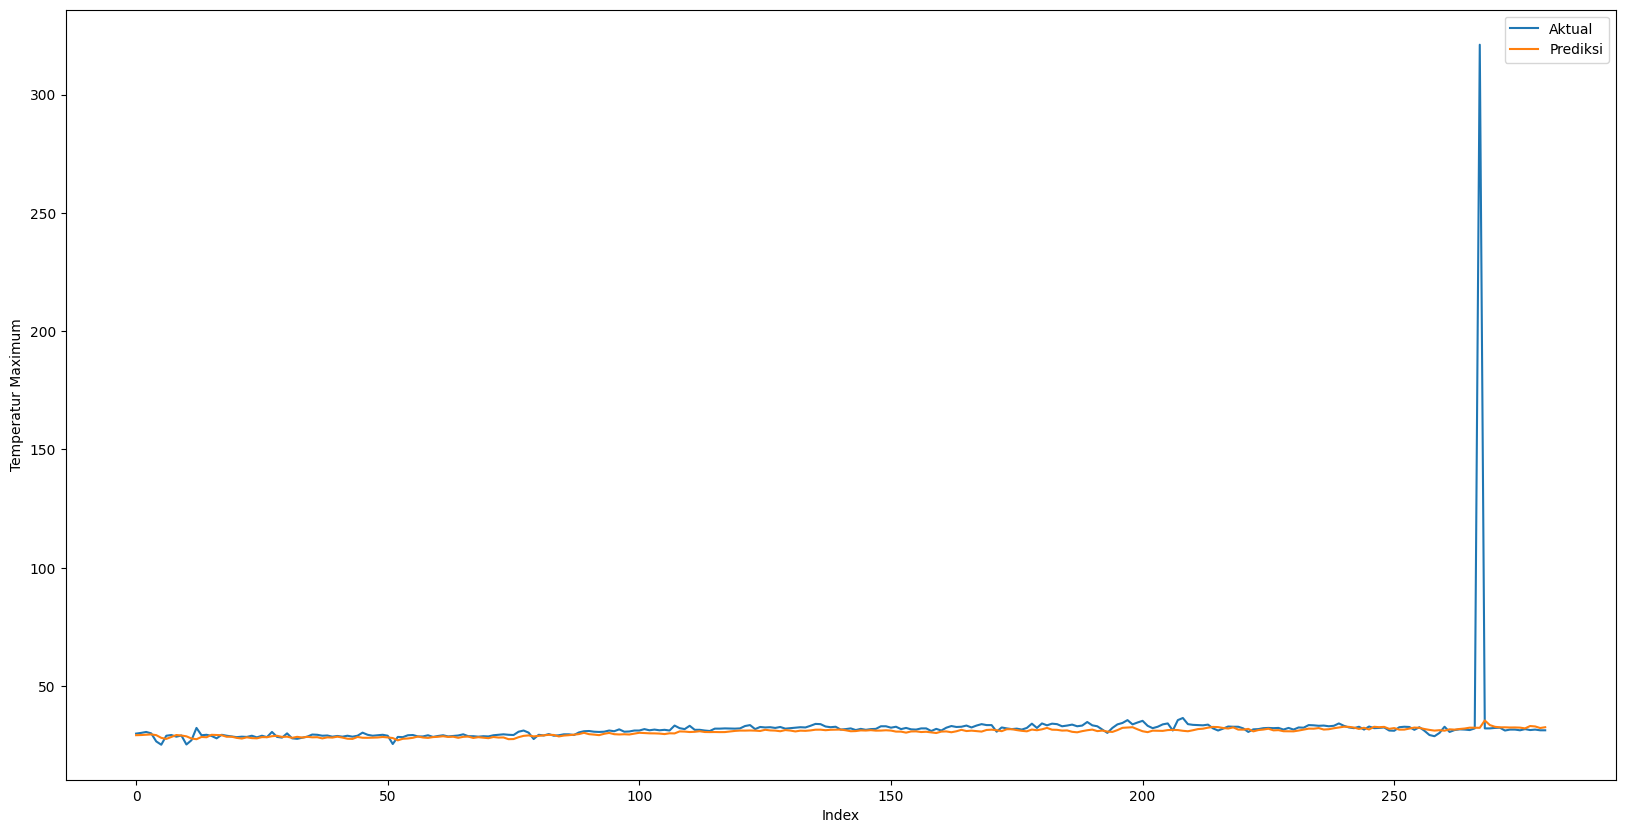

In [101]:
target_index = 1
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Temperatur Maximum')
plt.legend()
plt.show()

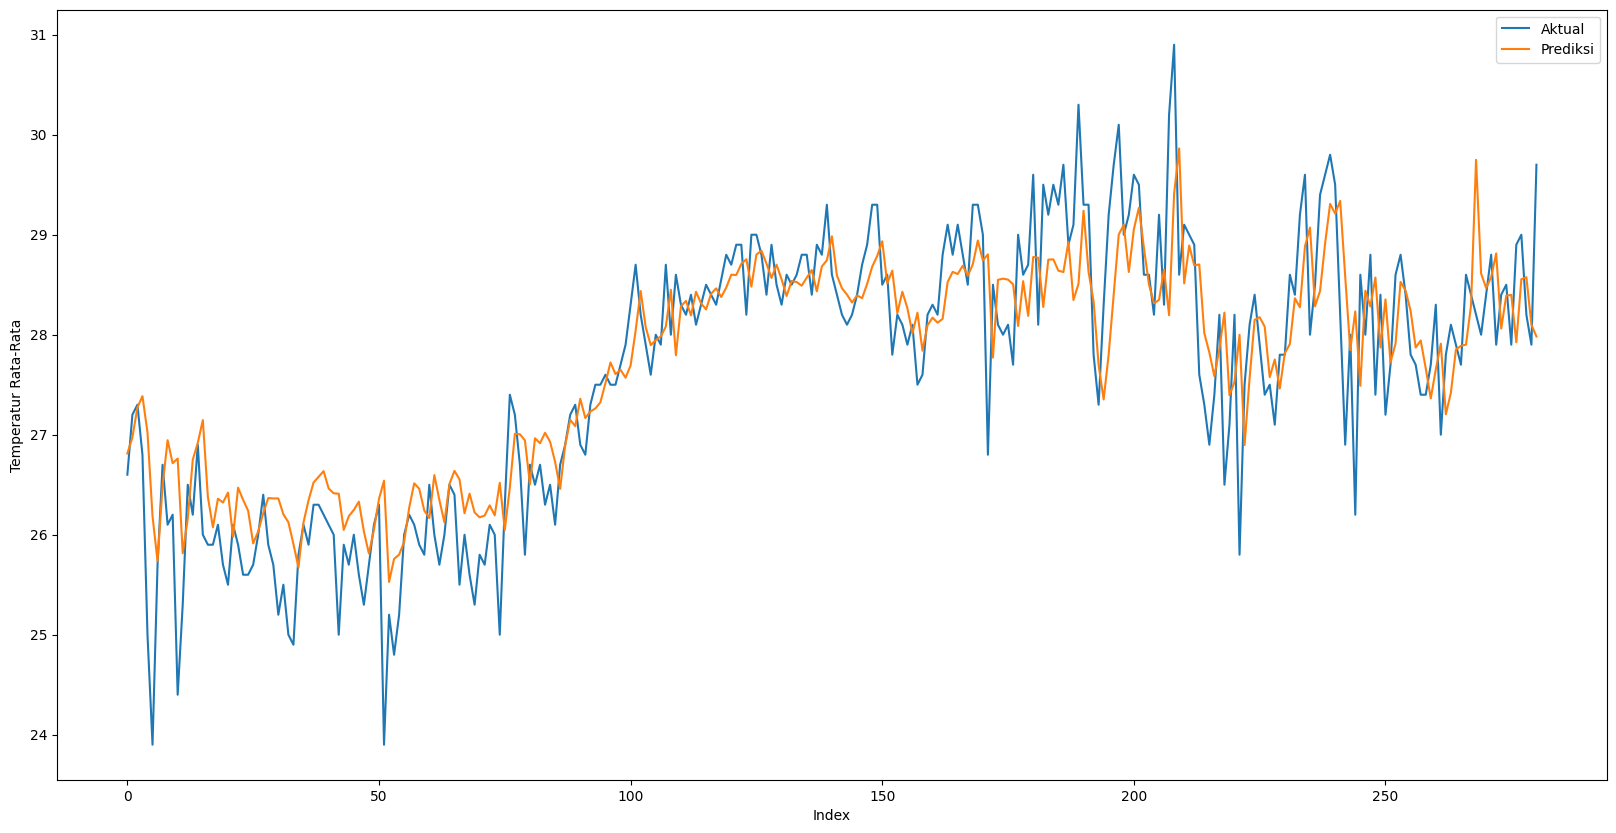

In [102]:
target_index = 2
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Temperatur Rata-Rata')
plt.legend()
plt.show()

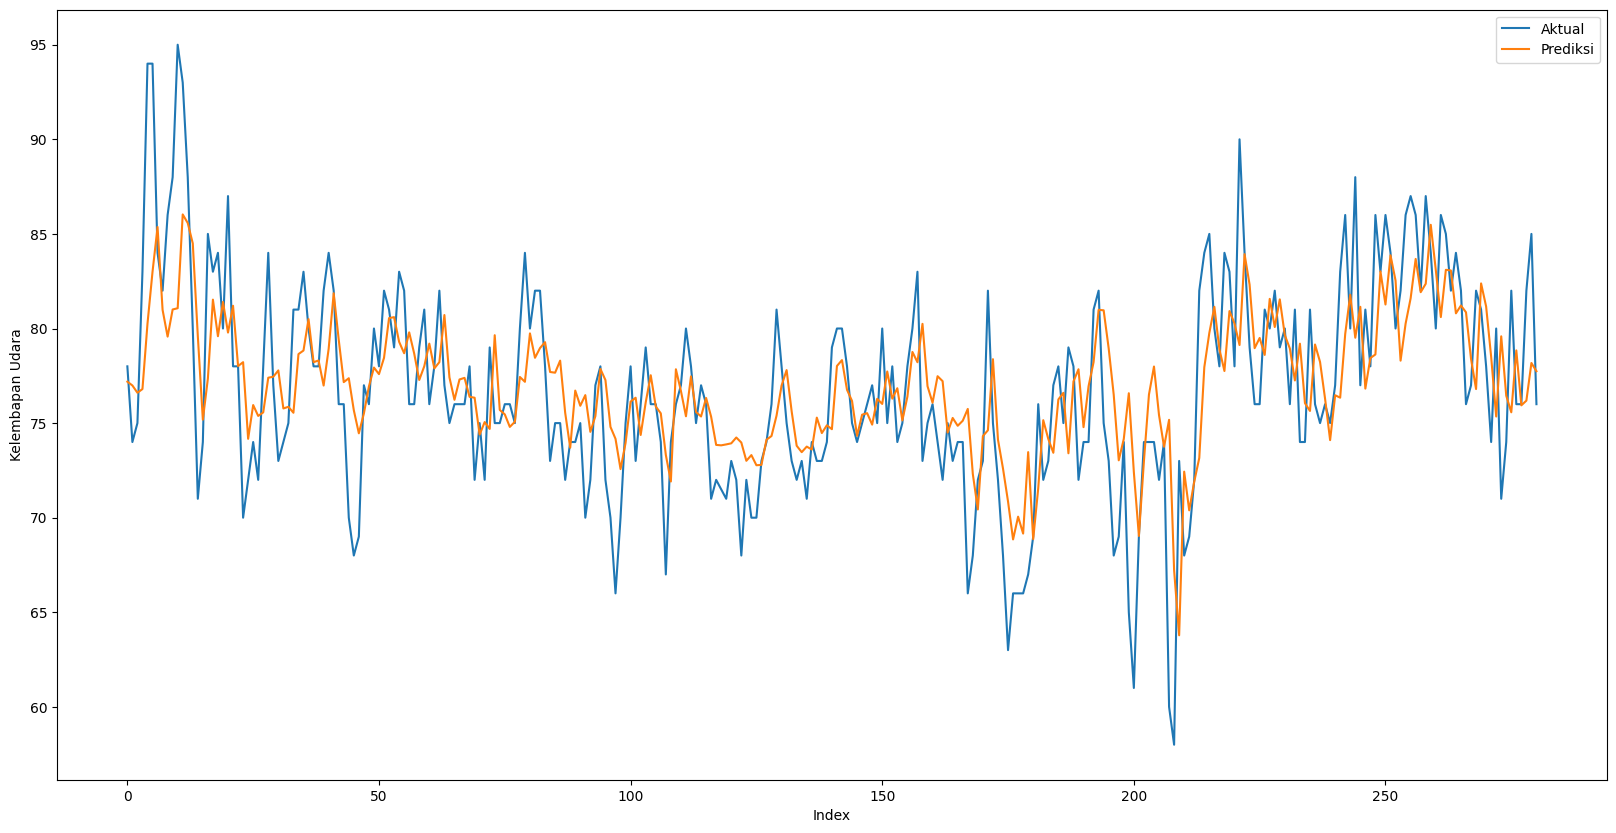

In [103]:
target_index = 3
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Kelembapan Udara')
plt.legend()
plt.show()

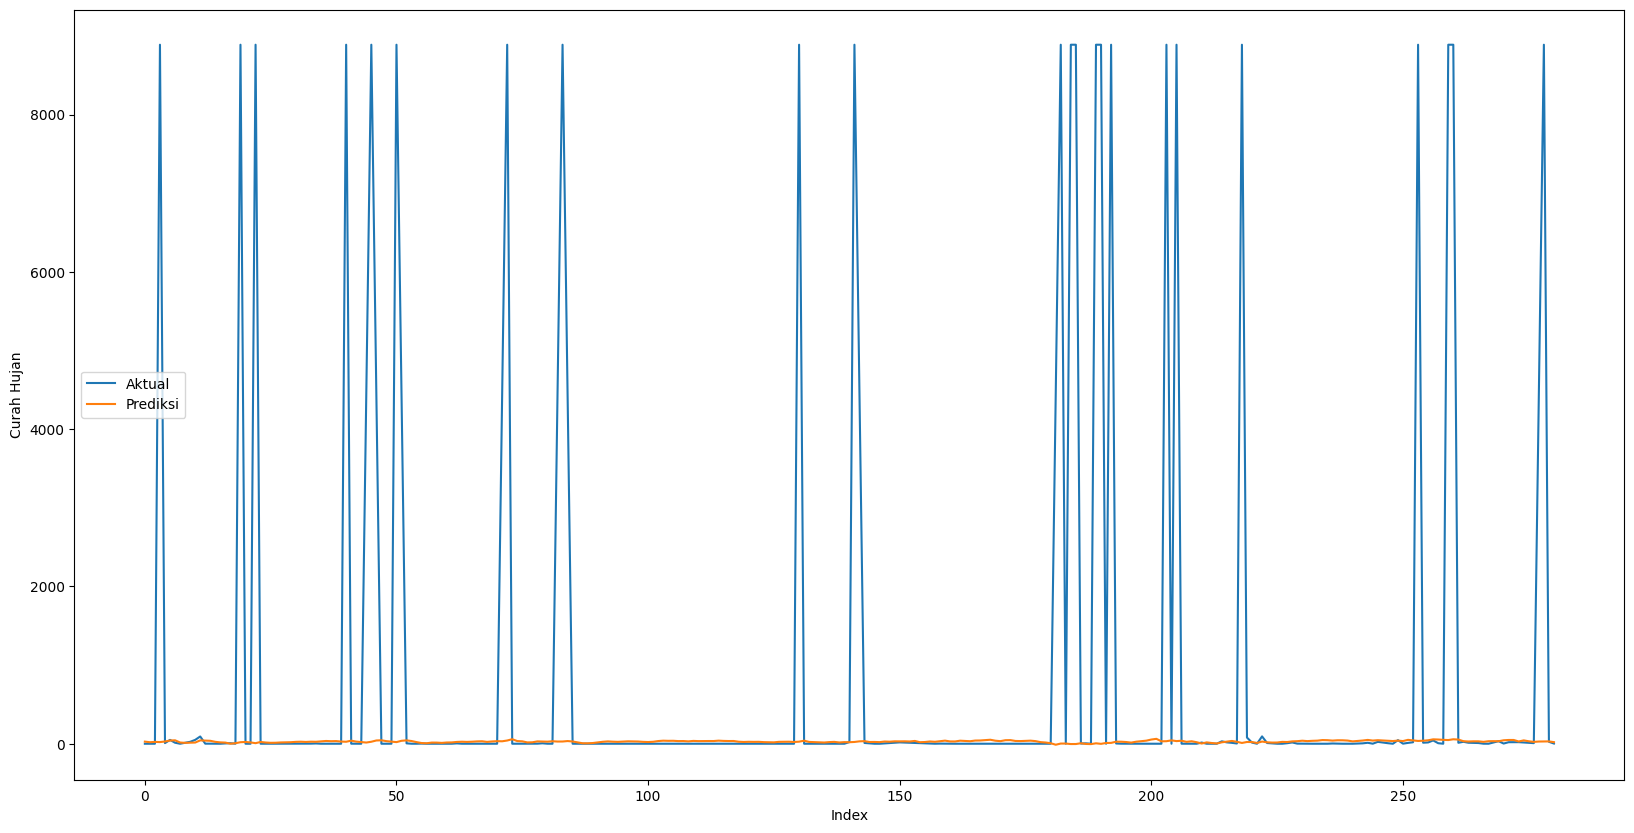

In [104]:
target_index = 4
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

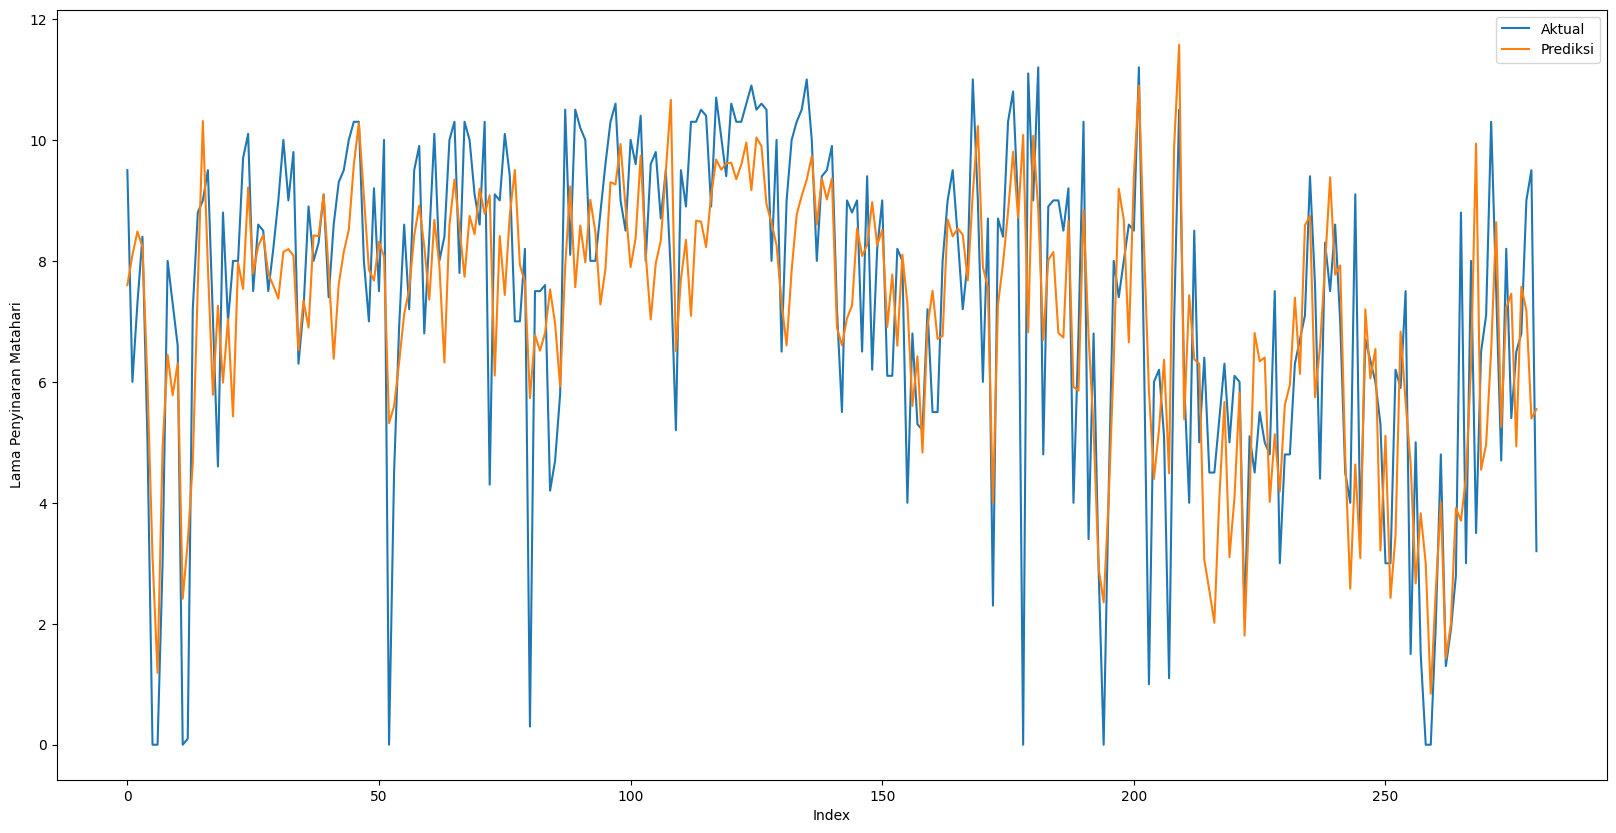

In [105]:
target_index = 5
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Lama Penyinaran Matahari')
plt.legend()
plt.show()

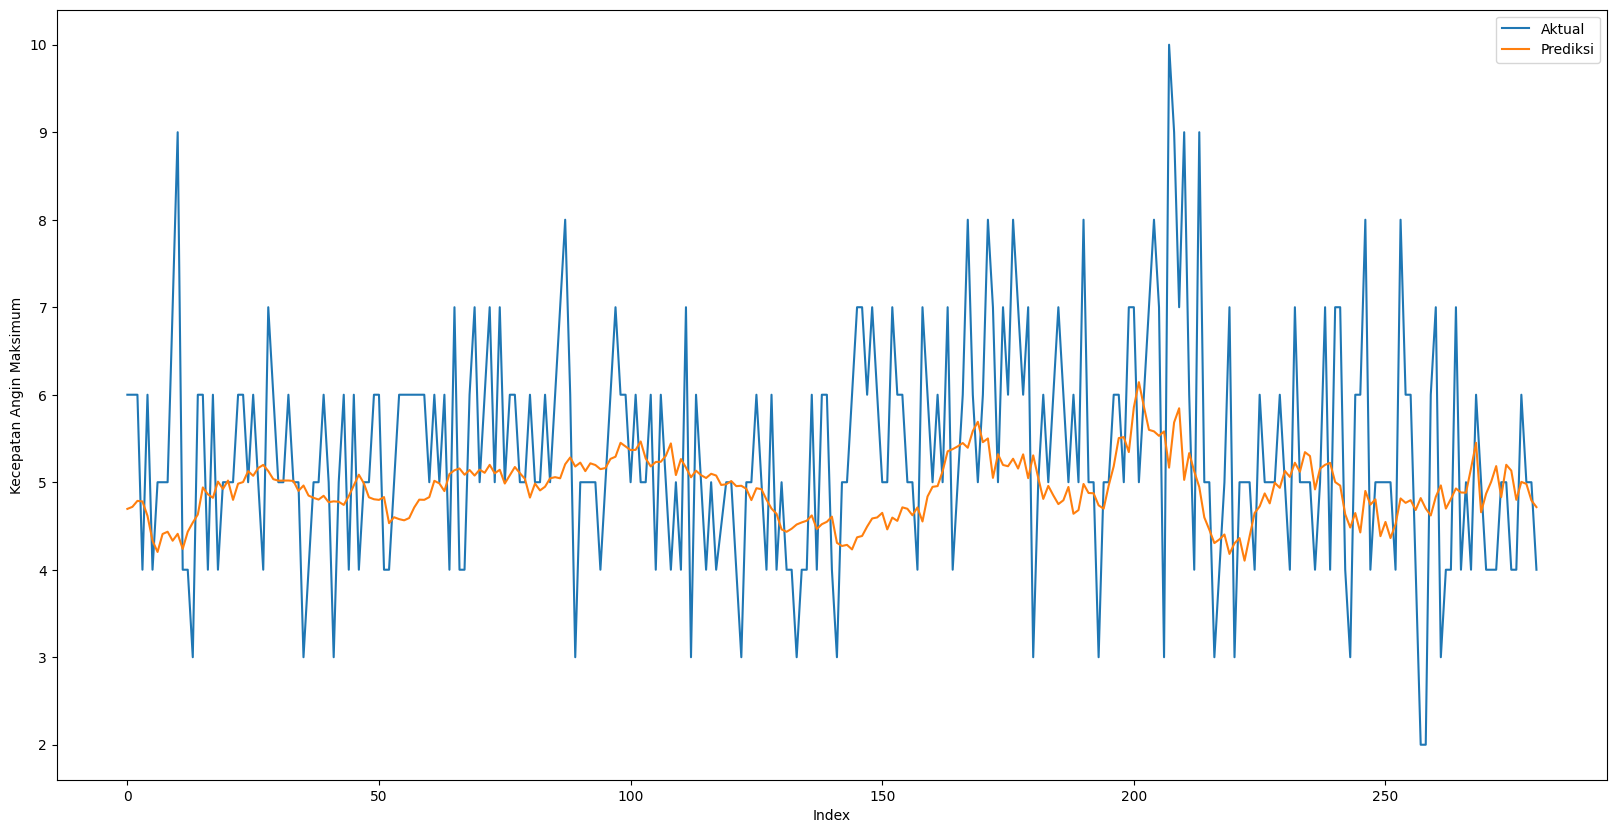

In [106]:
target_index = 6
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Kecepatan Angin Maksimum')
plt.legend()
plt.show()

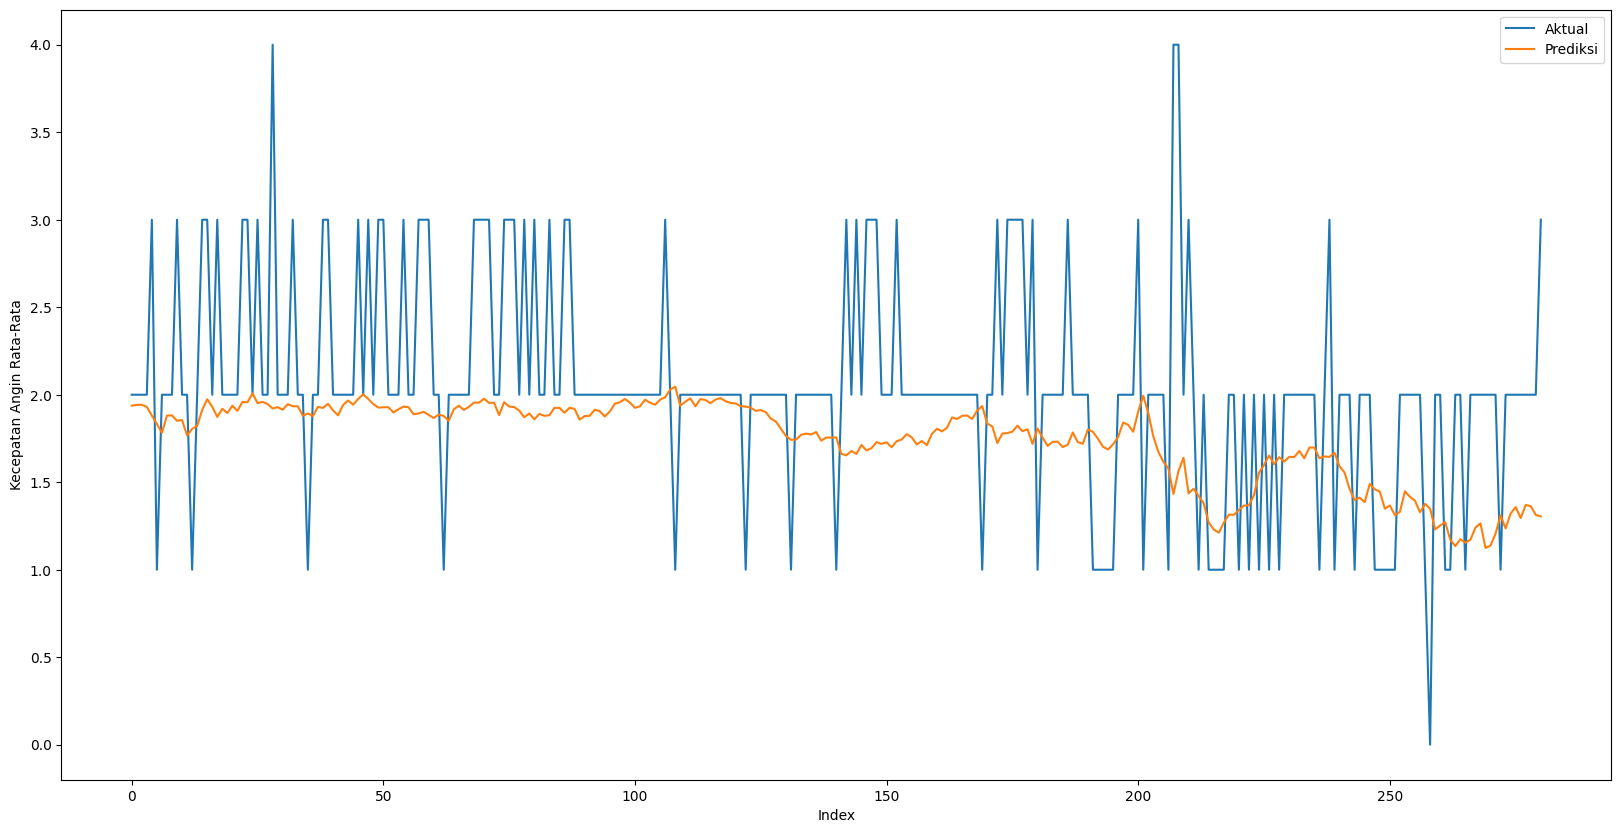

In [107]:
target_index = 7
plt.figure(figsize=(20,10))
plt.plot(y_test_origin[:,target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('Index')
plt.ylabel('Kecepatan Angin Rata-Rata')
plt.legend()
plt.show()

In [108]:

current_data = x_test_seq[-1]
predictions = []
for _ in range(30):
    next_prediction = model.predict(current_data.reshape(1, timesteps, n_features_input))
    predictions.append(next_prediction[0])
    current_data = np.concatenate((current_data[1:], next_prediction), axis=0)
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [109]:
from datetime import datetime, timedelta
import json

In [110]:
start_date = datetime(2024, 4, 3)
end_date = start_date + timedelta(days=len(predictions)-1)

date_range = pd.date_range(start=start_date, end=end_date)
df_predictions = pd.DataFrame(predictions, columns=['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_ag'])
df_predictions.insert(0, 'Tanggal', date_range)
df_predictions['Tanggal'] = df_predictions['Tanggal'].dt.strftime('%d-%m-%Y')
with open('data-prediksi.json', 'w') as f:
    f.write(df_predictions.to_json( orient='records', indent=4))
df_predictions.to_json('data-prediksi.xlsx', index=False)
